### Software you will need:
- ThorLabs Kinesis (https://www.thorlabs.com/software_pages/ViewSoftwarePage.cfm?Code=Motion_Control&viewtab=0)
- SwabianInstruments TimeTaggerLab (https://www.swabianinstruments.com/time-tagger/downloads/)

In [51]:
### import all the polarization controller libraries and make sure DLLs (dynamic-link libraries) are in the correct folder

import os
import clr
from System import Decimal, Convert 
import time

# Add references to the Thorlabs Kinesis DLLs
KINESIS_PATH = r"C:\Program Files\Thorlabs\Kinesis"

clr.AddReference(os.path.join(KINESIS_PATH, "Thorlabs.MotionControl.DeviceManagerCLI.dll"))
clr.AddReference(os.path.join(KINESIS_PATH, "Thorlabs.MotionControl.GenericMotorCLI.dll"))
clr.AddReference(os.path.join(KINESIS_PATH, "ThorLabs.MotionControl.PolarizerCLI.dll"))


# Import namespaces from the DLLs
from Thorlabs.MotionControl.DeviceManagerCLI import DeviceManagerCLI
from Thorlabs.MotionControl.GenericMotorCLI import GenericMotorCLI
from Thorlabs.MotionControl.PolarizerCLI import Polarizer, PolarizerPaddles

In [52]:
### import the TimeTagger library and a few other basic libraries

import TimeTagger
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Polarization controllers

Important:
- Angle range: 0 - 170 degrees, do not set beyond
- Increase velocity for smoother user experience, max is 100% but be mindful of how quickly youre changing it
- Make sure to safetly disconnect from the device to avoid connection issues (but play around with this, if you do run into an issue I found what works best is reconnecting the USB, opening Kinesis, connecting there, and then close Kinesis and go back to Python)

In [ ]:
### connect to and setup polarization controllers

device_id = "38469684" # unique to each device
DEFAULT_TIMEOUT_MS = 30000 # 30s, how long to wait when device is unresponsive

velocity = 50 # percentage

#connect to and initialize device
DeviceManagerCLI.BuildDeviceList() # find all devices
device_tel = Polarizer.CreatePolarizer(device_id) # mark our device as a polarizer
device_tel.Connect(device_id) # connect to device
device_tel.WaitForSettingsInitialized(DEFAULT_TIMEOUT_MS) # set the timeout time
device_tel.StartPolling(DEFAULT_TIMEOUT_MS) # 
time.sleep(0.5)  # wait after StartPolling to avoid random issues

# check and set velocity

vel_params = device_tel.GetPolParams() 
print(f"Current velocity: {vel_params.Velocity}")
print(f"Current Minvelocity: {vel_params.MinVelocity}")

vel_params.Velocity = velocity    # set new velocity
print(f"Current Velocity_update: {vel_params.Velocity}")
device_tel.SetPolParams(vel_params)

device_tel.StopPolling()
device_tel.Disconnect()

Current velocity: 50
Current Minvelocity: 10
Current Velocity_update: 50


In [ ]:
### connect to and setup polarization controllers

device_id = "38469684" # unique to each device
DEFAULT_TIMEOUT_MS = 30000 # 30s, how long to wait when device is unresponsive

velocity = 50 # percentage


#connect to and initialize device
DeviceManagerCLI.BuildDeviceList() # find all devices
device_tel = Polarizer.CreatePolarizer(device_id) # mark our device as a polarizer
device_tel.Connect(device_id) # connect to device
device_tel.WaitForSettingsInitialized(DEFAULT_TIMEOUT_MS) # set the timeout time
device_tel.StartPolling(DEFAULT_TIMEOUT_MS) # 
time.sleep(0.5)  # wait after StartPolling to avoid random issues

# check and set velocity

vel_params = device_tel.GetPolParams() 
print(f"Current velocity: {vel_params.Velocity}")
print(f"Current Minvelocity: {vel_params.MinVelocity}")

vel_params.Velocity = velocity    # set new velocity
print(f"Current Velocity_update: {vel_params.Velocity}")
device_tel.SetPolParams(vel_params)


### =========== move polarization controllers once ===========

positions=[0, 0] #angles 0 - 170 degrees

paddles = [PolarizerPaddles.Paddle1, PolarizerPaddles.Paddle2]

decimal_angles = [Decimal(a) for a in positions] # need angle as decimal

start_time = time.time()
for i in range(2):
    device_tel.MoveTo(decimal_angles[i], paddles[i], DEFAULT_TIMEOUT_MS)
end_time = time.time()
print(f"Total paddle move time: {end_time - start_time:.3f} seconds")

### =========== move polarization controllers once ===========


device_tel.StopPolling()
device_tel.Disconnect()

Current velocity: 50
Current Minvelocity: 10
Current Velocity_update: 50
Total paddle move time: 1.379 seconds


In [ ]:
### connect to and setup polarization controllers

device_id = "38469684" # unique to each device
DEFAULT_TIMEOUT_MS = 30000 # 30s

velocity = 50 # percentage


#connect to and initialize device
DeviceManagerCLI.BuildDeviceList() # find all devices
device_tel = Polarizer.CreatePolarizer(device_id) # mark our device as a polarizer
device_tel.Connect(device_id) # connect to device
device_tel.WaitForSettingsInitialized(DEFAULT_TIMEOUT_MS) # set the timeout time
device_tel.StartPolling(DEFAULT_TIMEOUT_MS) # 
time.sleep(0.5)  # wait after StartPolling to avoid random issues

# check and set velocity

vel_params = device_tel.GetPolParams() 
print(f"Current velocity: {vel_params.Velocity}")
print(f"Current Minvelocity: {vel_params.MinVelocity}")

vel_params.Velocity = velocity    # set new velocity
print(f"Current Velocity_update: {vel_params.Velocity}")
device_tel.SetPolParams(vel_params)


### =========== move polarization controllers in a sequence ===========

try:
    angles1 = np.linspace(0, 170, 18) # 0, 10, 20, ..., 170
    angles2 = np.linspace(0, 170, 18)
    positions = [[Decimal(a1), Decimal(a2)] for a1, a2 in zip(angles1, angles2)] # [0, 0], [10, 10], [20, 20], ..., [170, 170]

    paddles = [PolarizerPaddles.Paddle1, PolarizerPaddles.Paddle2]

    for pos in positions:

        start_time = time.time()
        for i in range(2):
            device_tel.MoveTo(pos[i], paddles[i], DEFAULT_TIMEOUT_MS)
        end_time = time.time()

        print(f"Total paddle move time: {end_time - start_time:.3f} seconds")

### =========== move polarization controllers in a sequence ===========


finally: 
    # this will always run, even when something errors - make sure to safely disconnect from device

    for i in range(2): 
        device_tel.MoveTo(Decimal(0), paddles[i], DEFAULT_TIMEOUT_MS) # return back to 0, 0

    device_tel.StopPolling()
    device_tel.Disconnect()

Current velocity: 50
Current Minvelocity: 10
Current Velocity_update: 50
Total paddle move time: 0.059 seconds
Total paddle move time: 0.209 seconds
Total paddle move time: 0.193 seconds
Total paddle move time: 0.192 seconds
Total paddle move time: 0.191 seconds
Total paddle move time: 0.191 seconds
Total paddle move time: 0.193 seconds
Total paddle move time: 0.191 seconds
Total paddle move time: 0.192 seconds
Total paddle move time: 0.192 seconds
Total paddle move time: 0.193 seconds
Total paddle move time: 0.191 seconds
Total paddle move time: 0.192 seconds
Total paddle move time: 0.191 seconds
Total paddle move time: 0.191 seconds
Total paddle move time: 0.193 seconds
Total paddle move time: 0.192 seconds
Total paddle move time: 0.192 seconds


### Part 2: Data from TimeTagger

In [ ]:
### connect to time tagger and collect data

def get_timestamps(runtime):
    
    tagger = TimeTagger.createTimeTagger() # create a timetagger

    # channel_list_tagger = tagger.getChannelList(TimeTagger.ChannelEdge.Rising) # get list of all channels
    channel_list_tagger = [5, 6, 7, 8] # or just specific channels, these are sufficient in your case

    # Set threshold trigger level on all channels (minimum voltage needed to get a reading, cuts out unnecessary noise)
    for channel in channel_list_tagger:
        tagger.setTriggerLevel(channel, 0.5) # in V

    # start a stream
    stream = TimeTagger.TimeTagStream(tagger=tagger, n_max_events=int(100e6), channels=np.array(channel_list_tagger))
    stream.startFor(int(runtime * 1e12)) # 1s, given in picoseconds
    

    tag_list = []
    channel_list = []

    overflows = 0

    while stream.isRunning():
        # getData() does not return timestamps, but an instance of TimeTagStreamBuffer
        # that contains more information than just the timestamp
        data = stream.getData()

        if data.size > 0:
            # With the following methods, we can retrieve a numpy array for the particular information:
            channel = data.getChannels()            # The channel numbers
            channel_list.append(channel)
            timestamps = data.getTimestamps()       # The timestamps in ps
            tag_list.append(timestamps)
            overflow_types = data.getEventTypes()   # TimeTag = 0, Error = 1, OverflowBegin = 2, OverflowEnd = 3, MissedEvents = 4
            missed_events = data.getMissedEvents()  # The numbers of missed events in case of overflow
            overflows += np.sum(missed_events)

    TimeTagger.freeTimeTagger(tagger) # free time tagger, need to do this before trying to create another time tagger with TimeTagger.createTimeTagger()

    return tag_list, channel_list

In [ ]:
### this just gives timestamps - what time a photon arrived at each channel (for reference)

timestamps, channels = get_timestamps(1) # set runtime in seconds

# Number of total events 
print(len(timestamps))

# First 10 timestamps and their corresponding channels
for t, c in zip(timestamps[:10], channels[:10]):
    print(f"Channel {c}: {t*1e-12} s")

data = {ch: timestamps[np.where(channels == ch)] for ch in np.unique(channels)}

0


In [72]:
def get_coincidences(channel_pairs, runtime=1, binwidth=100, n_bins=10000):
    """
    channel_pairs: list of tuples, e.g., [(5,7), (5,8), (6,7)]
    returns: dict {(ch1,ch2): (hist_data, hist_bins)}
    """
    tagger = TimeTagger.createTimeTagger()

    # Set trigger levels for all involved channels
    all_channels = set(ch for pair in channel_pairs for ch in pair)
    for ch in all_channels:
        tagger.setTriggerLevel(ch, 0.5)

    # Start the stream
    stream = TimeTagger.TimeTagStream(tagger, n_max_events=int(100e6), channels=list(all_channels))

    # Create histogram modules for all channel pairs
    hists = {}
    for ch1, ch2 in channel_pairs:
        hists[(ch1, ch2)] = TimeTagger.Correlation(tagger, channel_1=ch1, channel_2=ch2,
                                                   binwidth=binwidth, n_bins=n_bins)

    # Start measurement
    stream.startFor(int(runtime * 1e12))  # runtime in ps

    # Collect data
    results = {}
    for pair, hist in hists.items():
        hist_data = hist.getData()
        hist_bins = hist.getIndex()
        results[pair] = (hist_data, hist_bins)

    TimeTagger.freeTimeTagger(tagger)

    return results


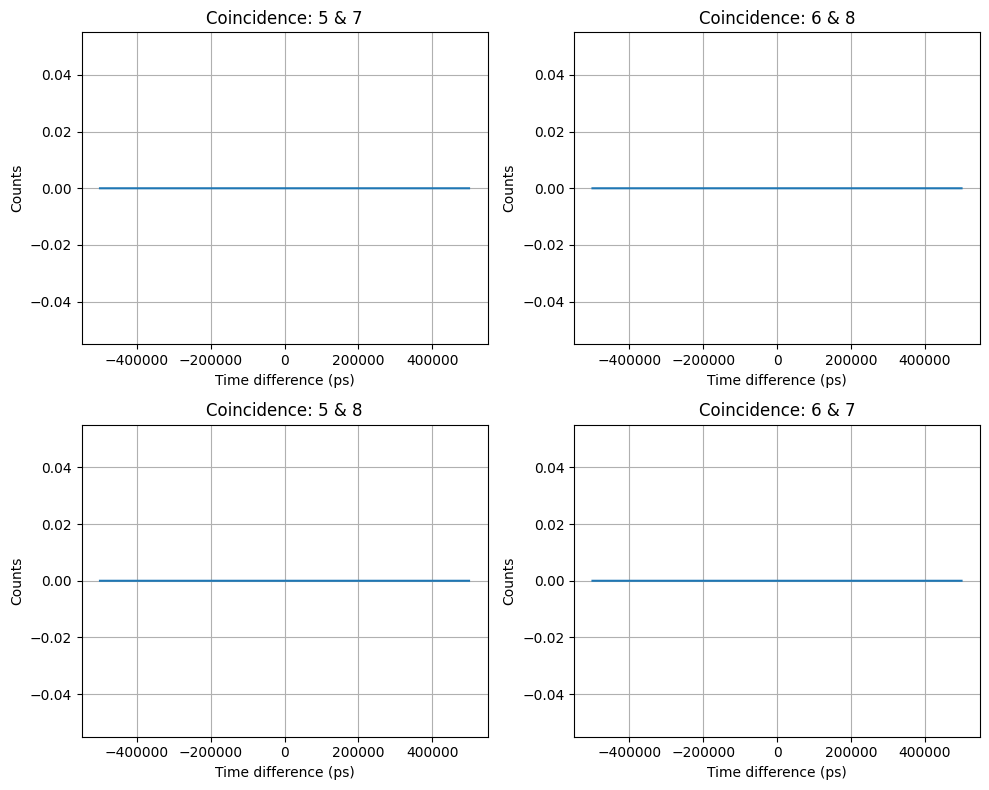

In [80]:
### plot coincidences (just for reference)

channel_pairs = [[5, 7], [6, 8], [5, 8], [6, 7]]
results = get_coincidences(channel_pairs)

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # flatten for easy indexing

for idx, (ch_pair, (hist_data, hist_bins)) in enumerate(results.items()):
    ax = axes[idx]
    ax.plot(hist_bins, hist_data, drawstyle="steps-mid")
    ax.set_xlabel("Time difference (ps)")
    ax.set_ylabel("Counts")
    ax.set_title(f"Coincidence: {ch_pair[0]} & {ch_pair[1]}")
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
### get peak for each coincidence

channel_pairs = [[5, 7], [6, 8], [5, 8], [6, 7]]
results = get_coincidences(channel_pairs)

peaks = {ch_pair: max(hist_data) for ch_pair, (hist_data, hist_bins) in results.items()}

print(peaks)

### you will want to maximize peaks for (5, 7) and (6, 8) and minimize for (5, 8) and (6, 7)
### or alternatively minimize peaks for (5, 7) and (6, 8) and maximize for (5, 8) and (6, 7)

{(5, 7): np.int32(0), (6, 8): np.int32(0), (5, 8): np.int32(0), (6, 7): np.int32(0)}
